## Especialização em Ciência de Dados - Turma 2018.1 - Facens
## Aula2 | Exercício 2

* **Data de entrega:** 20/10/2018 07:59
* **Professor:**  Matheus Mota

## Análise Dataset
### Cota Parlamentar SP

O dataset contém dados sobre o uso de dinheiro publico por emissão de gasto cada politico do estado São Paulo.
Contém 11 variaveis, sendo que a selecionada para o estudo incial foi o gasto a partir do sigla do partido.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ds = pd.read_csv('../input/cota_parlamentar_sp.csv', delimiter=',')
ds.head(5)

,datemissao,nudeputadoid,nulegislatura,numano,nummes,sgpartido,txnomeparlamentar,txtdescricao,txtdescricaoespecificacao,txtfornecedor,vlrdocumento
0,01/01/2018 00:00,3011,2015,2018,1,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,CENTRO EMPRESARIAL MEDITERRANEO,91606
1,01/01/2018 00:00,3011,2015,2018,1,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,CENTRO EMPRESARIAL MEDITERRANEO,86864
2,01/01/2018 00:00,3011,2015,2018,1,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,CENTRO EMPRESARIAL MEDITERRANEO,90555
3,19/01/2018 00:00,3011,2015,2018,2,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,CENTRO EMPRESARIAL MEDITERRANEO,85142
4,19/01/2018 00:00,3011,2015,2018,2,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,CENTRO EMPRESARIAL MEDITERRANEO,83963


In [5]:
resposta = [["datemissao", "Qualitativa Ordinal"],["nudeputadoid","Quantitativa Ordinal"], ["nulegislatura","Quantitativa Ordinal"], ["numano","Quantitativa Ordinal"], ["nummes","Quantitativa Ordinal"],  ["sgpartido","Qualitativa Nominal"], ["txnomeparlamentar","Quantitativa Nominal"], ["txtdescricao","Quantitativa Nominal"], ["txtdescricaoespecificacao","Quantitativa Nominal"], ["txtfornecedor","Qualitativa Nominal"], ["vlrdocumento","Quantitativas Continua"]] #variáveis relacionadas a tempo são contínuas, mas podem ser discretas pois não há perdas -- (discretização)
resposta = pd.DataFrame(resposta, columns=["Variavel", "Classificação"])
resposta

,Variavel,Classificação
0,datemissao,Qualitativa Ordinal
1,nudeputadoid,Quantitativa Ordinal
2,nulegislatura,Quantitativa Ordinal
3,numano,Quantitativa Ordinal
4,nummes,Quantitativa Ordinal
5,sgpartido,Qualitativa Nominal
6,txnomeparlamentar,Quantitativa Nominal
7,txtdescricao,Quantitativa Nominal
8,txtdescricaoespecificacao,Quantitativa Nominal
9,txtfornecedor,Qualitativa Nominal


In [8]:
ds.isnull().values.any()

True

In [9]:
ds.isnull().sum()

datemissao                     6169
nudeputadoid                      0
nulegislatura                     0
numano                            0
nummes                            0
sgpartido                         0
txnomeparlamentar                 0
txtdescricao                      0
txtdescricaoespecificacao    416052
txtfornecedor                     0
vlrdocumento                      0
dtype: int64

In [10]:
ds.fillna('Não Informado', inplace=True) 
ds.head(10)

,datemissao,nudeputadoid,nulegislatura,numano,nummes,sgpartido,txnomeparlamentar,txtdescricao,txtdescricaoespecificacao,txtfornecedor,vlrdocumento
0,01/01/2018 00:00,3011,2015,2018,1,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,91606
1,01/01/2018 00:00,3011,2015,2018,1,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,86864
2,01/01/2018 00:00,3011,2015,2018,1,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,90555
3,19/01/2018 00:00,3011,2015,2018,2,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,85142
4,19/01/2018 00:00,3011,2015,2018,2,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,83963
5,19/01/2018 00:00,3011,2015,2018,2,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,8525
6,28/02/2018 00:00,3011,2015,2018,3,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,89408
7,28/02/2018 00:00,3011,2015,2018,3,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,86038
8,28/02/2018 00:00,3011,2015,2018,3,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,89247
9,30/04/2018 00:00,3011,2015,2018,5,PPS,ALEX MANENTE,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Não Informado,CENTRO EMPRESARIAL MEDITERRANEO,9143


In [11]:
ds.isnull().sum()

datemissao                   0
nudeputadoid                 0
nulegislatura                0
numano                       0
nummes                       0
sgpartido                    0
txnomeparlamentar            0
txtdescricao                 0
txtdescricaoespecificacao    0
txtfornecedor                0
vlrdocumento                 0
dtype: int64

# **Gráficos**

## Analise de gastos por partidos.

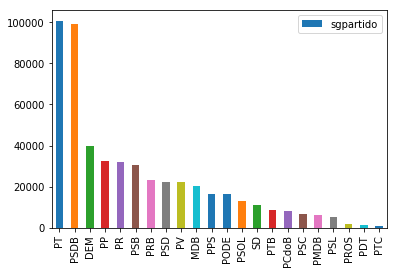

In [14]:
ds['sgpartido'].value_counts().plot.bar().legend()

***O gráfico abaixo foi descartado devido a dificil vizualização e entendimento dos dados***

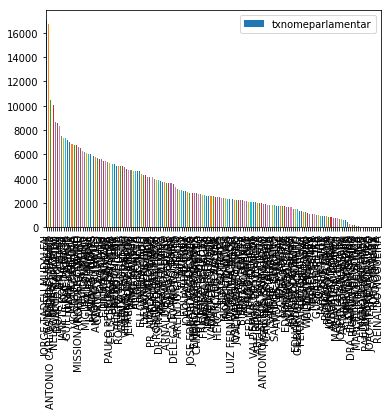

In [17]:
ds['txnomeparlamentar'].value_counts().plot.bar().legend()

## Descobrindo qual candidato que mais teve emissões de gastos

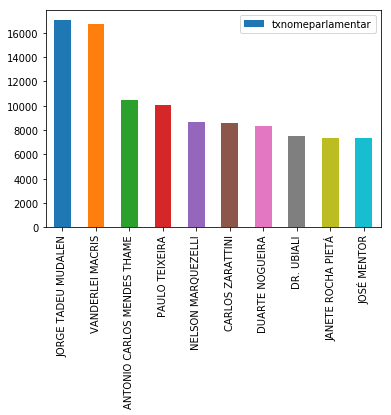

In [18]:
ds['txnomeparlamentar'].value_counts().head(10).plot.bar().legend()

## O candidato que mais tem emissões de gastos é JORGE TADEU MUDALEN - DEM
### Então decimos analisar os maiores gastos dele

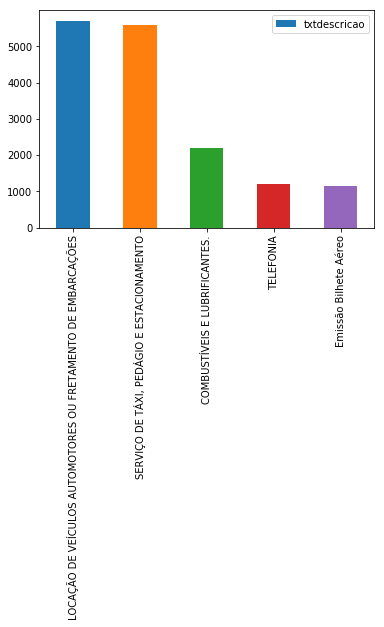

In [20]:
ds[ds['txnomeparlamentar']== 'JORGE TADEU MUDALEN']['txtdescricao'].value_counts().head(5).plot.bar().legend()

## Lavantantamos a Hipotese dele ser o candidato que mais viaja no Brasil

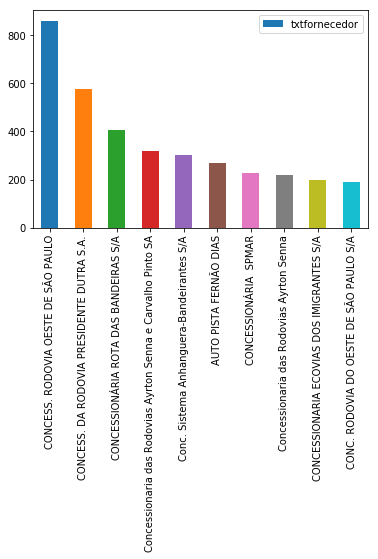

In [21]:
desc = ds[ds['txnomeparlamentar']== 'JORGE TADEU MUDALEN']
desc = desc[desc['txtdescricao']=='SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO']
desc['txtfornecedor'].value_counts().head(10).plot.bar().legend()

## Decidimos analisar as viagens de avião, para ver a frequencia de uso

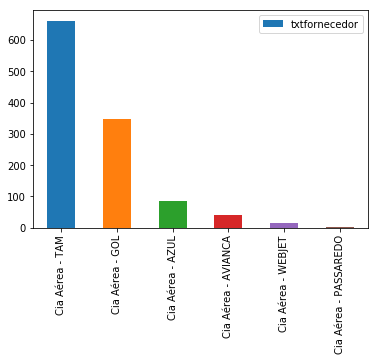

In [22]:
desc = ds[ds['txnomeparlamentar']== 'JORGE TADEU MUDALEN']
desc = desc[desc['txtdescricao']=='Emissão Bilhete Aéreo']
desc['txtfornecedor'].value_counts().head(10).plot.bar().legend()

## E realmente descobirmos que ele é um dos candidato que mais viajou pelo Brasil e pelo Mundo


**Folha - 04/12/2016**
Mudalen fez 28 viagens desde 2010 e está atualmente na 29ª, segundo seu gabinete –esta, ainda sem registro no órgãos de transparência da Casa.
[https://www1.folha.uol.com.br/poder/2016/12/1838248-deputados-federais-viajam-ao-exterior-a-cada-dois-dias-aponta-levantamento.shtml]


**Veja Dez/2016**
Na Câmara, os campeões de viagens ao exterior são Jorge Tadeu Mudalen (DEM-SP) e Claudio Cajado (DEM-BA). Só os dois viajaram para 21 países das Américas, Europa e Ásia.
https://veja.abril.com.br/brasil/camara-banca-uma-viagem-ao-exterior-a-cada-dois-dias-a-deputados/